# BOMBAY STOCK EXCHANGE

## TASK: 
TO CURATE AN INDEX WITH COMPANIES OF USER'S CHOICE, RE-BALANCE THE INDEX COMPANIES AND WEIGHTS ACCORDING TO THEIR PERFORMANCE AND TRACK INDEX PERFORMANCE IN COMPARISON TO SENSEX 500.

### DATA SOURCE:
Historic stock price data and Sensex500 values were collected from www.bseindia.com . 


### INPUTS:
##### 3 input files will be required-
a) Index companies and their Scripcode and ISIN code and total number of shares (no.of shares data obtained from bse extranet->equity->ci).Convert no of shares data into crores prior importing the excel file. 

A drawback of this data is that number of shares are full float instead of free float and number of shares for everyday is not avalailable so it was assumed to be constant throughout the period of analysis.

b) Daily closing price data for the index companies through out the duration.

c) Sensex 500 index data for the duration.

In [557]:
# import the libraries
import pandas as pd
import numpy as nm
import math
from numpy import log as ln
from datetime import datetime, date,timedelta
import datetime
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

In [558]:
df1= pd.read_excel('C:\\Users\\archi\\OneDrive\\Desktop\\bse_intern\\Assignment4\\inputs\\num_shares.xlsx')
# df1 has the no.of shares data for each company of the index before rebalancing.

In [559]:
df2= pd.read_excel('C:\\Users\\archi\\OneDrive\\Desktop\\bse_intern\\Assignment4\\inputs\\collected_data.xlsx')
# df2 will have the closing price of companies for the decided duration

In [560]:
end_date= df2['Date'].max()
start_date= df2['Date'].min()

In [561]:
ind_comp= df1['Company Name']
ind_comp # list of companies

0       Bharat Petroleum Corporation Ltd
1                         Coal India Ltd
2                    SAREGAMA INDIA LTD.
3                     Gillette India Ltd
4                   Grindwell Norton Ltd
5        Happiest Minds Technologies Ltd
6      HDFC Asset Management Company Ltd
7                 Hindustan Unilever Ltd
8                    Larsen & Toubro Ltd
9                Maruti Suzuki India Ltd
10         Mazagon Dock Shipbuilders Ltd
11                          Mindtree Ltd
12              Aditya Birla Capital Ltd
13                      Nestle India Ltd
14              VADILAL ENTERPRISES LTD.
15                           Siemens Ltd
16           Sumitomo Chemical India Ltd
17    Sun Pharmaceuticals Industries Ltd
18                        Tata Elxsi Ltd
19                Jubilant FoodWorks Ltd
Name: Company Name, dtype: object

#### Calculating market cap for the companies.
    Market Cap: The total value of all a company's shares of stock. It is calculated by multiplying the price of a stock by its total number of outstanding shares. 
    Market Cap = (no.of shares)*(closing price for the day)

In [562]:
#calculating market cap
df3=pd.DataFrame()
for comp in ind_comp:
    df3[comp]=[]

for comp in ind_comp:
    shares=df1.loc[df1["Company Name"]==comp]
    shares=float(shares['no of shares'])
    c=[]
    for i in range(len(df2)):    
        val=shares*df2[comp][i]
        c.append(val)
    df3[comp]=c

df3['Date']=df2['Date']
df3=df3.set_index('Date')
df3

,Bharat Petroleum Corporation Ltd,Coal India Ltd,SAREGAMA INDIA LTD.,Gillette India Ltd,Grindwell Norton Ltd,Happiest Minds Technologies Ltd,HDFC Asset Management Company Ltd,Hindustan Unilever Ltd,Larsen & Toubro Ltd,Maruti Suzuki India Ltd,Mazagon Dock Shipbuilders Ltd,Mindtree Ltd,Aditya Birla Capital Ltd,Nestle India Ltd,VADILAL ENTERPRISES LTD.,Siemens Ltd,Sumitomo Chemical India Ltd,Sun Pharmaceuticals Industries Ltd,Tata Elxsi Ltd,Jubilant FoodWorks Ltd
Date,,,,,,,,,,,,,,,,,,,,
2021-04-01,94915.653814,81502.082125,3291.161590,18556.466451,10311.9072,8725.898180,63193.384346,563772.675361,202980.252900,209117.942336,4330.28430,109.854222,29359.468956,164891.603739,161.750250,66234.806227,14407.841670,146559.777514,17254.310466,38967.158286
2021-04-05,92833.171179,79992.213684,3282.677972,18226.052351,10205.6160,9079.839350,61961.575679,557663.738079,197219.157493,204458.357410,4230.44775,114.870984,29021.170548,163031.262499,161.750250,64929.625493,14090.884127,146019.940403,17780.857767,37461.391540
2021-04-06,92887.402498,80331.163742,3424.971376,18353.786401,10373.9104,9814.891447,61521.110762,565675.844283,196839.768284,203962.946112,4335.32655,111.397841,28815.775086,164661.652256,163.613613,63524.731087,14248.115034,148767.111480,17905.722029,36912.400333
2021-04-07,92887.402498,80885.809292,3466.811035,18309.307580,10346.7840,9864.090739,61863.457586,564865.235297,197268.337576,207374.940389,4302.04770,111.783745,30869.729704,167962.444294,158.730912,63791.821278,14659.910266,148947.057184,18350.687193,37838.822994
2021-04-08,93397.176893,81132.318425,3389.590834,18074.205239,10246.5824,9753.943072,64097.777202,566169.258448,199404.158312,206216.463359,4290.95475,111.655111,30869.729704,170346.322872,162.293731,65567.080749,14527.636646,147387.527751,18457.179905,37846.741136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,78125.637575,114595.933241,8510.514484,15999.667399,19610.1728,16410.533747,45874.474444,459121.880551,246026.876745,224126.790117,5021.07255,325.446348,26399.357888,165614.239530,150.966900,80988.868392,20320.222913,216438.692471,52566.608857,34543.556065
2022-03-28,78028.021202,117862.179254,8395.696433,15805.133654,19840.4704,15834.094290,44667.195301,463738.827381,244670.911607,225862.240061,4858.71210,341.654348,25891.910277,162590.160598,150.962587,80933.669753,20799.402819,217098.493384,56265.206629,34906.470925
2022-03-29,77756.864609,114534.305957,8444.284424,15816.538480,20633.7792,15557.990805,44681.059814,467157.482667,245254.046873,224684.127827,4801.23045,326.732697,25940.238621,163162.869951,150.962587,81832.873396,21171.266392,220613.432797,53248.847258,34698.619687


#### Calculating total market cap for each day(combined of all companies) and computing the Relative Index Value

In [563]:
df5=pd.DataFrame()
df5['Daily Market Cap']=[]
c=[]
for i in range(len(df3)):
    summ=0
    for comp in ind_comp:
        summ= summ+ df3[comp][i]
    summ=round(summ,2)
    c.append(summ)
df5['Daily Market Cap']=c
df5['Date']=df2['Date']
df5=df5.set_index('Date')
df5['Relative Index Value']=100.0
for i in range(1,len(df5)):
    df5['Relative Index Value'][i]=round((df5['Daily Market Cap'][i]*df5['Relative Index Value'][0])/df5['Daily Market Cap'][0],2)

df5

,Daily Market Cap,Relative Index Value
Date,,
2021-04-01,1738644.28,100.00
2021-04-05,1711764.60,98.45
2021-04-06,1722631.64,99.08
2021-04-07,1734125.21,99.74
2021-04-08,1741448.60,100.16
...,...,...
2022-03-25,1830771.51,105.30
2022-03-28,1838541.41,105.75
2022-03-29,1840467.55,105.86


In [564]:
df4=pd.DataFrame()
df4=df5.drop('Daily Market Cap',axis=1)
df4=df4.reset_index()
df4 # dropped the daily market cap now

,Date,Relative Index Value
0,2021-04-01,100.00
1,2021-04-05,98.45
2,2021-04-06,99.08
3,2021-04-07,99.74
4,2021-04-08,100.16
...,...,...
243,2022-03-25,105.30
244,2022-03-28,105.75
245,2022-03-29,105.86
246,2022-03-30,107.23


In [565]:
# to calculate individual contribution to the fall or growth of the index value of each company
df6=pd.DataFrame()
df6=df3
# calculating the conserved weight of the index
weight= round(df5['Daily Market Cap'][start_date]/df5['Relative Index Value'][start_date],4)

for date in df2['Date']:
    for comp in ind_comp:
        df6[comp][date]=df6[comp][date]/weight
df6=df6.reset_index()
df6

,Date,Bharat Petroleum Corporation Ltd,Coal India Ltd,SAREGAMA INDIA LTD.,Gillette India Ltd,Grindwell Norton Ltd,Happiest Minds Technologies Ltd,HDFC Asset Management Company Ltd,Hindustan Unilever Ltd,Larsen & Toubro Ltd,...,Mazagon Dock Shipbuilders Ltd,Mindtree Ltd,Aditya Birla Capital Ltd,Nestle India Ltd,VADILAL ENTERPRISES LTD.,Siemens Ltd,Sumitomo Chemical India Ltd,Sun Pharmaceuticals Industries Ltd,Tata Elxsi Ltd,Jubilant FoodWorks Ltd
0,2021-04-01,5.459176,4.687680,0.189295,1.067295,0.593100,0.501879,3.634636,32.425993,11.674628,...,0.249061,0.006318,1.688642,9.483918,0.009303,3.809566,0.828683,8.429544,0.992400,2.241238
1,2021-04-05,5.339400,4.600838,0.188807,1.048291,0.586987,0.522237,3.563787,32.074631,11.343272,...,0.243319,0.006607,1.669184,9.376919,0.009303,3.734497,0.810452,8.398494,1.022685,2.154632
2,2021-04-06,5.342519,4.620333,0.196991,1.055638,0.596667,0.564514,3.538453,32.535456,11.321451,...,0.249351,0.006407,1.657370,9.470692,0.009410,3.653693,0.819496,8.556501,1.029867,2.123056
3,2021-04-07,5.342519,4.652235,0.199397,1.053080,0.595106,0.567344,3.558143,32.488833,11.346101,...,0.247437,0.006429,1.775506,9.660541,0.009130,3.669055,0.843181,8.566851,1.055460,2.176341
4,2021-04-08,5.371839,4.666413,0.194956,1.039557,0.589343,0.561009,3.686653,32.563835,11.468945,...,0.246799,0.006422,1.775506,9.797652,0.009334,3.771161,0.835573,8.477153,1.061585,2.176796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2022-03-25,4.493480,6.591109,0.489491,0.920238,1.127900,0.943870,2.638520,26.406890,14.150501,...,0.288792,0.018718,1.518388,9.525482,0.008683,4.658162,1.168740,12.448705,3.023425,1.986810
244,2022-03-28,4.487866,6.778970,0.482888,0.909049,1.141146,0.910715,2.569082,26.672439,14.072511,...,0.279454,0.019651,1.489201,9.351548,0.008683,4.654987,1.196300,12.486654,3.236154,2.007683
245,2022-03-29,4.472270,6.587564,0.485682,0.909705,1.186774,0.894835,2.569879,26.869066,14.106051,...,0.276148,0.018792,1.491981,9.384488,0.008683,4.706706,1.217688,12.688819,3.062665,1.995729
246,2022-03-30,4.492233,6.484772,0.509963,0.903043,1.175025,0.906787,2.652628,27.236645,14.331938,...,0.278584,0.019222,1.505184,9.591167,0.008929,4.793860,1.227593,12.700549,3.217725,1.986354


#### Filtering data to get data for start date end date, highest and lowest index value date

In [566]:
# filtering data to get data for start date end date, highest and lowest index value date
df7=pd.DataFrame()
# df7= pd.DataFrame(df4.iloc[0],columns=list(df4.columns))
df7=df7.append(df4.loc[df4['Relative Index Value']==df4['Relative Index Value'].max()])
df7=df7.append(df4.loc[df4['Relative Index Value']==df4['Relative Index Value'].min()])
df7=df7.append(df4.iloc[0])
df7=df7.append(df4.iloc[-1])
df7= df7.sort_values(by=['Date'])
df7=df7.reset_index()
df7=df7.drop(['index'],axis=1)
df7

,Date,Relative Index Value
0,2021-04-01,100.00
1,2021-04-23,96.73
2,2021-10-18,118.83
3,2022-03-31,107.56


#### Individual contribution of points by each company to the custom index on start,high,low and end dates.

In [567]:
df8=pd.DataFrame()
for date in df7['Date']:
    df8=df8.append(df6.loc[df6['Date']==date])
    
df8=df8.reset_index()
df8=df8.drop(['index'],axis=1)
df8['Relative Index Value']=df7['Relative Index Value']
df8=df8.set_index('Date')
df8.T

Date,2021-04-01,2021-04-23,2021-10-18,2022-03-31
Bharat Petroleum Corporation Ltd,5.459176,5.279512,5.767350,4.481627
Coal India Ltd,4.687680,4.473234,6.568069,6.486544
SAREGAMA INDIA LTD.,0.189295,0.194119,0.478962,0.535458
Gillette India Ltd,1.067295,1.019588,1.088548,0.908309
Grindwell Norton Ltd,0.593100,0.561387,1.003530,1.145890
Happiest Minds Technologies Ltd,0.501879,0.545339,1.189382,0.891329
HDFC Asset Management Company Ltd,3.634636,3.460366,3.596727,2.632938
Hindustan Unilever Ltd,32.425993,31.190820,35.867990,27.688010
Larsen & Toubro Ltd,11.674628,10.691472,14.451146,14.284256
Maruti Suzuki India Ltd,12.027644,11.597278,13.295198,13.134918


#### Calculating percentage change in contribution to the index value and sorting the list to find out the 4 most underperforming companies to replace during rebalancing.

In [568]:
df9=pd.DataFrame()
for comp in ind_comp:
    c=[]
    df9[comp]=0.0
    val= (df8[comp][end_date]-df8[comp][start_date])/df8[comp][start_date]
    c.append(val)
    df9[comp]=c
df9=df9.T
df9.columns = [''] * len(df9.columns)
df9.columns=['Relative Contribution Percentage']
df9=df9.sort_values(by=['Relative Contribution Percentage'],ascending=False)
df9

,Relative Contribution Percentage
Tata Elxsi Ltd,2.190735
Mindtree Ltd,2.066745
SAREGAMA INDIA LTD.,1.828700
Grindwell Norton Ltd,0.932034
Happiest Minds Technologies Ltd,0.775982
Sumitomo Chemical India Ltd,0.557422
Sun Pharmaceuticals Industries Ltd,0.497585
Coal India Ltd,0.383743
Siemens Ltd,0.273536
Larsen & Toubro Ltd,0.223530


#### Importing Sensex 500 data

In [569]:
## sensex 500
sensex500_raw = pd.read_excel('C:\\Users\\archi\\OneDrive\\Desktop\\bse_intern\\Assignment4\\inputs\\sensex500_21_22.xlsx')

In [570]:
sensex500=sensex500_raw

#### Standardizing sensex500 index to compare to our custom index.

In [571]:
sensex500['Standardized Sensex500']=100.00
for i in range(1,len(sensex500)):
    sensex500['Standardized Sensex500'][i]=round((sensex500['Close'][i]*sensex500['Standardized Sensex500'][0])/sensex500['Close'][0],2)
sensex500=sensex500.drop(['Close'],axis=1)
sensex500['Custom Index']=df4['Relative Index Value']
sensex500

,Date,Standardized Sensex500,Custom Index
0,2021-04-01,100.00,100.00
1,2021-04-05,98.56,98.45
2,2021-04-06,99.02,99.08
3,2021-04-07,100.01,99.74
4,2021-04-08,100.50,100.16
...,...,...,...
243,2022-03-25,117.26,105.30
244,2022-03-28,117.47,105.75
245,2022-03-29,118.20,105.86
246,2022-03-30,119.30,107.23


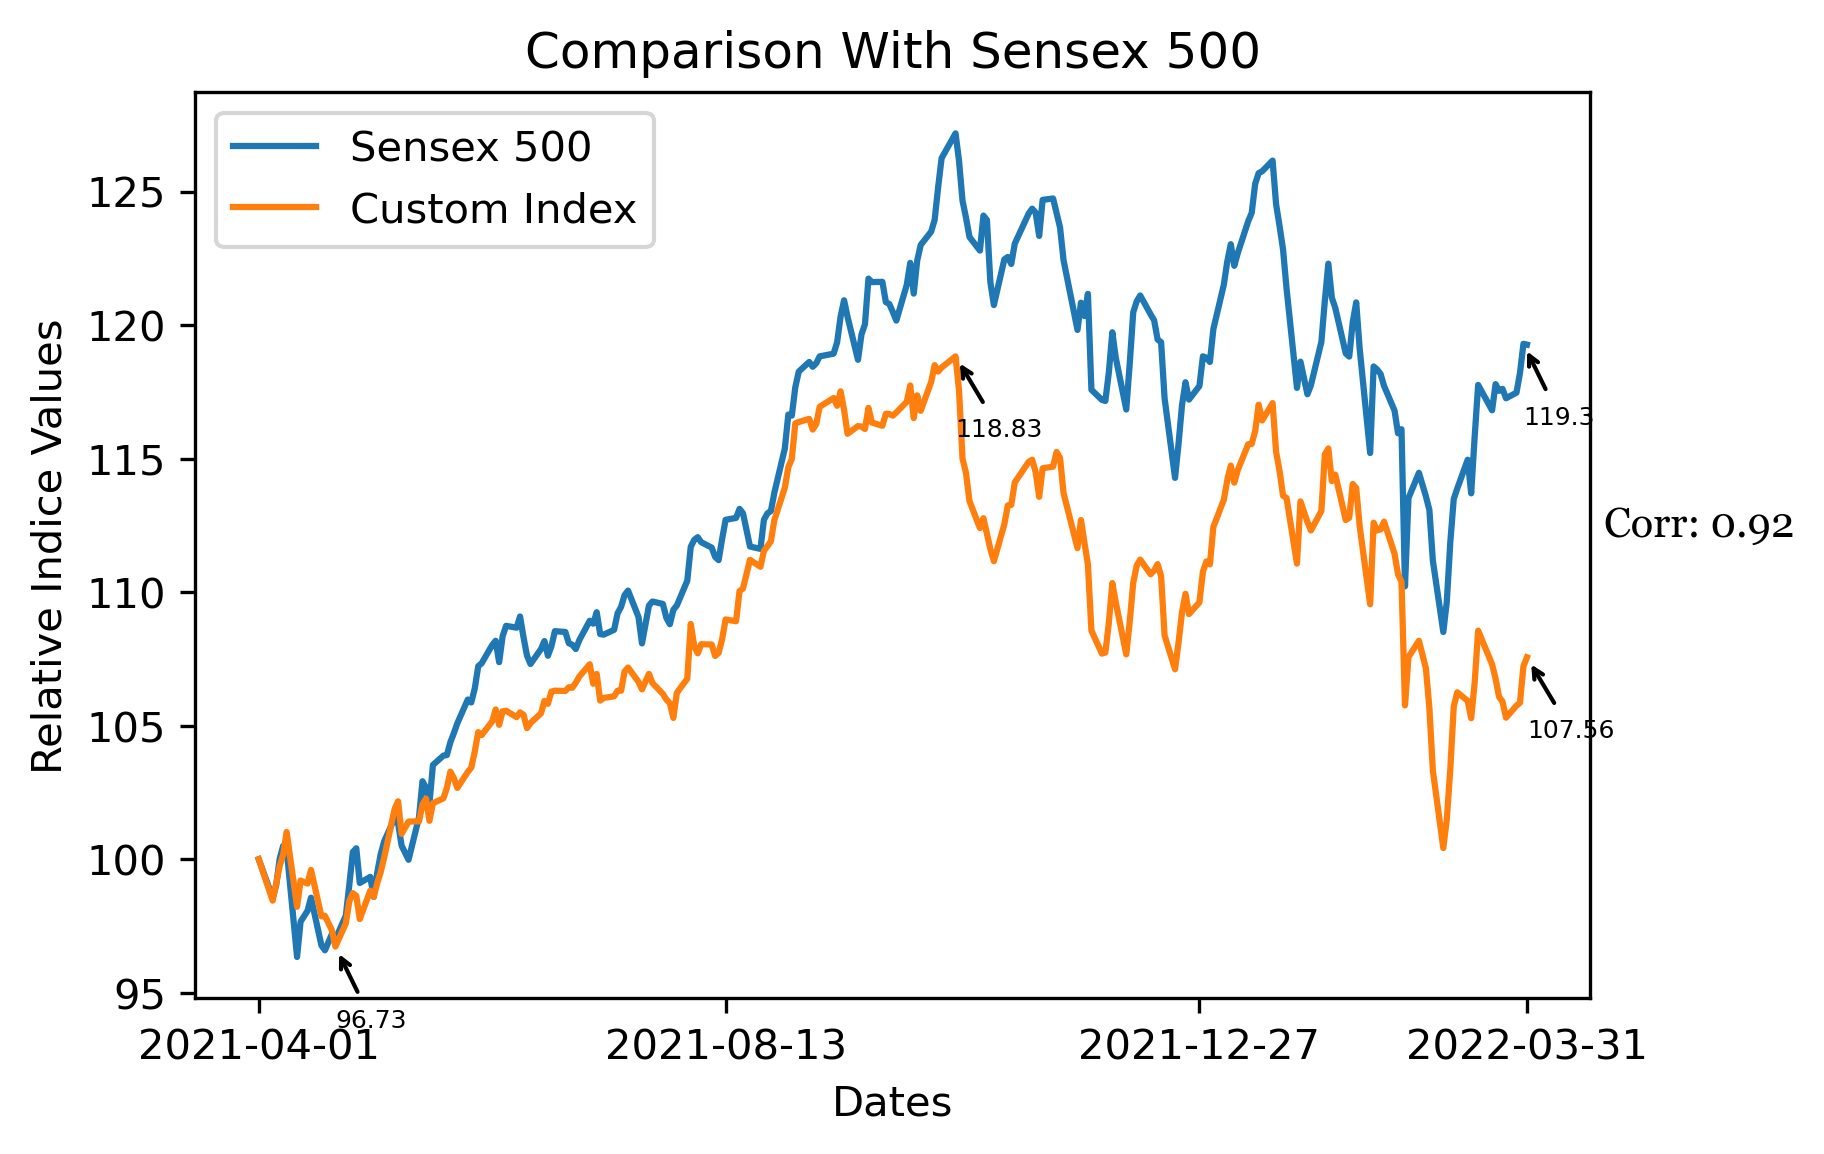

In [572]:
corr= round(np.corrcoef(sensex500['Standardized Sensex500'],sensex500['Custom Index'])[0,1],3)

plt.figure(dpi=300)
compare1= plt.plot(sensex500.Date,sensex500['Standardized Sensex500'],label='Sensex 500')
compare2= plt.plot(sensex500.Date,sensex500['Custom Index'],label='Custom Index')
plt.title('Comparison With Sensex 500')
plt.xlabel('Dates')
plt.ylabel('Relative Indice Values')
bins= list(sensex500['Date'][::91])
plt.xticks(bins+[end_date])
for i in range(1,len(df7)):
    plt.annotate(str(df7['Relative Index Value'][i]),xy=(df7['Date'][i],df7['Relative Index Value'][i]),xytext=(df7['Date'][i],df7['Relative Index Value'][i]-3),fontsize=6,arrowprops={"arrowstyle":"->"})
plt.annotate(str(list(sensex500['Standardized Sensex500'][-2:-1]))[1:-1],xy=(sensex500['Date'][-2:-1],sensex500['Standardized Sensex500'][-2:-1]),xytext=(sensex500['Date'][-2:-1],sensex500['Standardized Sensex500'][-2:-1]-3),fontsize=6,arrowprops={"arrowstyle":"->"})
plt.text(1.01, 0.5,'Corr: '+str(corr) ,fontsize=10, fontfamily='Georgia', color='k',ha='left', va='bottom',transform=plt.gca().transAxes);
plt.legend()
plt.show()

### Now we re-balance our index and replace the 4 most underperforming companies with new companies of user's choice,collect the necessary data and analyse to track the index growth.

In [573]:
df2_1= pd.read_excel('C:\\Users\\archi\\OneDrive\\Desktop\\bse_intern\\Assignment4\\inputs\\iteration2\\updated_index_no_of_shares.xlsx')
# df_2_1 has no of shares of the rebalanced index companies.

In [574]:
df2_2= pd.read_excel('C:\\Users\\archi\\OneDrive\\Desktop\\bse_intern\\Assignment4\\inputs\\iteration2\\price_data_iteration2.xlsx')
#df_2_2 has the closing price for the companies 

In [575]:
end_date= df2_2['Date'].max()
start_date= df2['Date'].min()
start_date_2= df2_2['Date'].min()

In [576]:
ind_comp= df2_1['Company Name']
ind_comp # the new set of companies in the index

0     MANGALORE REFINERY & PETROCHEMICALS LTD.
1                               Coal India Ltd
2                          SAREGAMA INDIA LTD.
3               COLGATE-PALMOLIVE (INDIA) LTD.
4                         Grindwell Norton Ltd
5              Happiest Minds Technologies Ltd
6                           BAJAJ FINSERV LTD.
7                                      ITC Ltd
8                          Larsen & Toubro Ltd
9                      Maruti Suzuki India Ltd
10               Mazagon Dock Shipbuilders Ltd
11                                Mindtree Ltd
12                    Aditya Birla Capital Ltd
13                            Nestle India Ltd
14                    VADILAL ENTERPRISES LTD.
15                                 Siemens Ltd
16                 Sumitomo Chemical India Ltd
17          Sun Pharmaceuticals Industries Ltd
18                              Tata Elxsi Ltd
19                      Jubilant FoodWorks Ltd
Name: Company Name, dtype: object

#### Relative index values for the rebalanced index

In [577]:
#calculating market cap and relative index values for the rebalanced index
df2_3=pd.DataFrame()
for comp in ind_comp:
    df2_3[comp]=[]

for comp in ind_comp:
    shares=df2_1.loc[df2_1["Company Name"]==comp]
    shares=float(shares['no of shares'])
    c=[]
    for i in range(len(df2_2)):    
        val=shares*df2_2[comp][i]
        c.append(val)
    df2_3[comp]=c

df2_3['Date']=df2_2['Date']
df2_3=df2_3.set_index('Date')


df2_5=pd.DataFrame()
df2_5['Daily Market Cap']=[]
c=[]
for i in range(len(df2_3)):
    summ=0
    for comp in ind_comp:
        summ= summ+ df2_3[comp][i]
    summ=round(summ,2)
    c.append(summ)
df2_5['Daily Market Cap']=c
df2_5['Date']=df2_2['Date']
df2_5=df2_5.set_index('Date')
c=float(df4['Relative Index Value'][-1:])
df2_5['Relative Index Value']=c
for i in range(1,len(df2_5)):
    df2_5['Relative Index Value'][i]=round((df2_5['Daily Market Cap'][i]*df2_5['Relative Index Value'][0])/df2_5['Daily Market Cap'][0],2)

df2_4=pd.DataFrame()
df2_4=df2_5.drop('Daily Market Cap',axis=1)
df2_4=df2_4.reset_index()
df2_4

,Date,Relative Index Value
0,2022-04-01,107.56
1,2022-04-04,108.90
2,2022-04-05,109.15
3,2022-04-06,109.55
4,2022-04-07,108.68
5,2022-04-08,109.83
6,2022-04-11,109.39
7,2022-04-12,108.07
8,2022-04-13,108.21
9,2022-04-18,107.85


#### Filtering data to get data for start date end date, highest and lowest index value date

In [578]:
# to calculate individual contribution to the fall or growth of the index value of each company
df2_6=pd.DataFrame()
df2_6=df2_3
# calculating the conserved weight of the index
weight= round(df2_5['Daily Market Cap'][start_date_2]/df2_5['Relative Index Value'][start_date_2],4)

for date in df2_2['Date']:
    for comp in ind_comp:
        df2_6[comp][date]=df2_6[comp][date]/weight
df2_6=df2_6.reset_index()


# filterinf data to get data for start date end date, highestand lowest index value date
df2_7=pd.DataFrame()
# df7= pd.DataFrame(df4.iloc[0],columns=list(df4.columns))
df2_7=df2_7.append(df2_4.loc[df2_4['Relative Index Value']==df2_4['Relative Index Value'].max()])
df2_7=df2_7.append(df2_4.loc[df2_4['Relative Index Value']==df2_4['Relative Index Value'].min()])
df2_7=df2_7.append(df2_4.iloc[0])
df2_7=df2_7.append(df2_4.iloc[-1])
df2_7= df2_7.sort_values(by=['Date'])
df2_7=df2_7.reset_index()
df2_7=df2_7.drop(['index'],axis=1)
df2_7

,Date,Relative Index Value
0,2022-04-01,107.56
1,2022-04-08,109.83
2,2022-05-12,97.03
3,2022-06-20,97.11


#### Individual contribution of points by each company to the rebalanced index on start,high,low and end dates.

In [579]:
df2_8=pd.DataFrame()
for date in df2_7['Date']:
    df2_8=df2_8.append(df2_6.loc[df2_6['Date']==date])
    
df2_8=df2_8.reset_index()
df2_8=df2_8.drop(['index'],axis=1)
df2_8['Relative Index Value']=df2_7['Relative Index Value']
df2_8=df2_8.set_index('Date')
df2_8.T

Date,2022-04-01,2022-04-08,2022-05-12,2022-06-20
MANGALORE REFINERY & PETROCHEMICALS LTD.,0.427996,0.500571,0.664114,0.761544
Coal India Ltd,6.511084,6.801242,5.831134,6.184219
SAREGAMA INDIA LTD.,0.526727,0.544987,0.396534,0.404299
COLGATE-PALMOLIVE (INDIA) LTD.,2.388983,2.414518,2.415675,2.290239
Grindwell Norton Ltd,1.134519,1.197609,1.043794,0.967986
Happiest Minds Technologies Ltd,0.905373,0.951902,0.718217,0.684518
BAJAJ FINSERV LTD.,15.467367,15.106005,11.599092,10.573820
ITC Ltd,17.738443,18.720611,17.682519,18.454971
Larsen & Toubro Ltd,14.271028,14.589863,12.150381,11.720751
Maruti Suzuki India Ltd,13.180651,12.950773,12.427358,13.125816


#### Calculating percentage change in contribution to the rebalanced index value and sorting the list

In [580]:
df2_9=pd.DataFrame()
for comp in ind_comp:
    c=[]
    df2_9[comp]=0.0
    val= (df2_8[comp][end_date]-df2_8[comp][start_date_2])/(df2_8[comp][start_date_2])
    c.append(val)
    df2_9[comp]=c
df2_9=df2_9.T
df2_9.columns = [''] * len(df2_9.columns)
df2_9.columns=['Relative Contribution Percentage']
df2_9.sort_values(by=['Relative Contribution Percentage'],ascending=False)

,Relative Contribution Percentage
MANGALORE REFINERY & PETROCHEMICALS LTD.,0.779326
ITC Ltd,0.040394
VADILAL ENTERPRISES LTD.,0.031222
Maruti Suzuki India Ltd,-0.004160
Nestle India Ltd,-0.033109
Siemens Ltd,-0.036278
Sumitomo Chemical India Ltd,-0.036632
COLGATE-PALMOLIVE (INDIA) LTD.,-0.041333
Coal India Ltd,-0.050201
Mazagon Dock Shipbuilders Ltd,-0.065646


#### Standardizing sensex500 index to compare to our rebalanced index.

In [581]:
df4=df4.append(df2_4)
df4=df4.reset_index()
df4=df4.drop('index',axis=1)

sensex500_2 = pd.read_excel('C:\\Users\\archi\\OneDrive\\Desktop\\bse_intern\\Assignment4\\inputs\\iteration2\\sensex500_22_23_jun20.xlsx')
sensex500_raw=sensex500_raw.append(sensex500_2)
sensex500=sensex500_raw.reset_index()
sensex500=sensex500.drop('index',axis=1)

sensex500['Standardized Sensex500']=100.00
for i in range(1,len(sensex500)):
    sensex500['Standardized Sensex500'][i]=round((sensex500['Close'][i]*sensex500['Standardized Sensex500'][0])/sensex500['Close'][0],2)
sensex500=sensex500.drop(['Close'],axis=1)
sensex500['Custom Index']=df4['Relative Index Value']
sensex500

,Date,Standardized Sensex500,Custom Index
0,2021-04-01,100.00,100.00
1,2021-04-05,98.56,98.45
2,2021-04-06,99.02,99.08
3,2021-04-07,100.01,99.74
4,2021-04-08,100.50,100.16
...,...,...,...
297,2022-06-14,107.32,99.71
298,2022-06-15,107.29,100.05
299,2022-06-16,104.96,98.48
300,2022-06-17,104.24,97.76


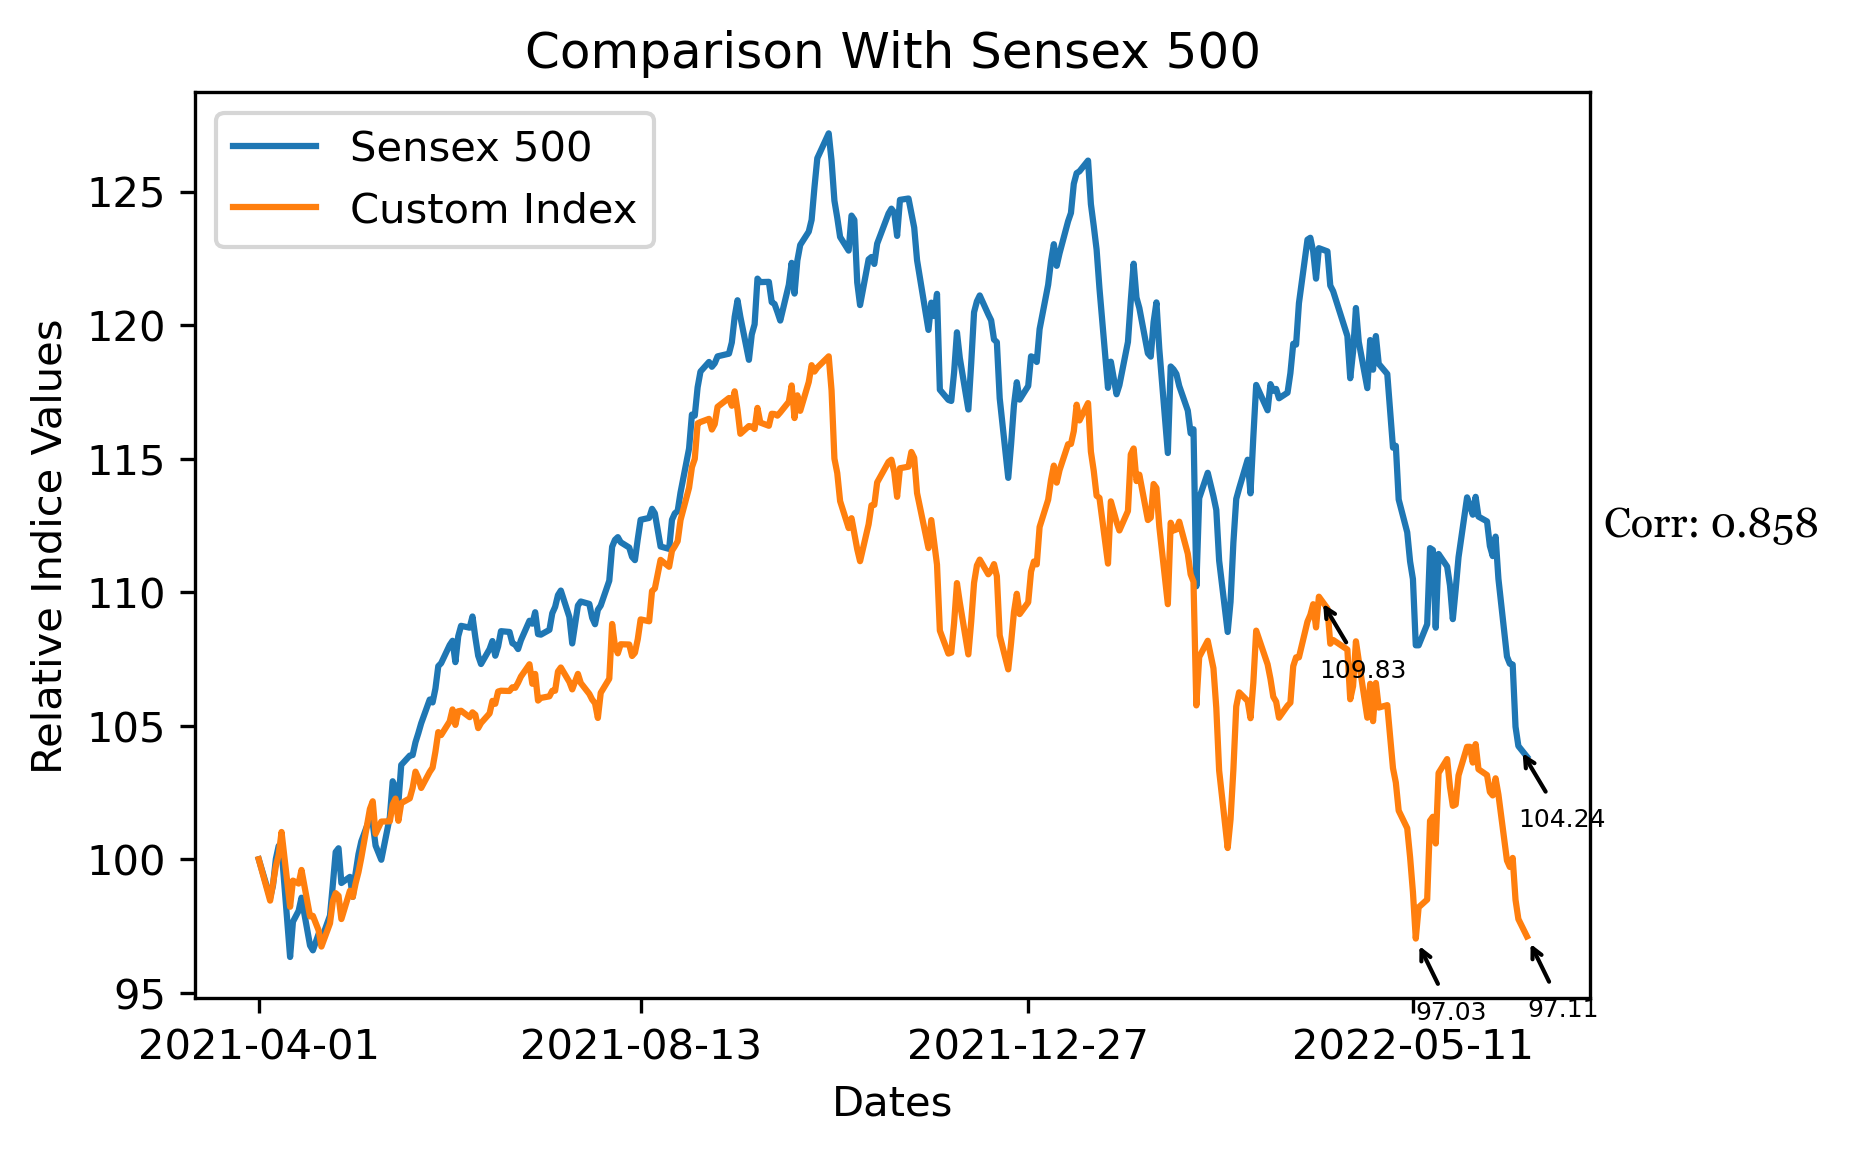

In [582]:
corr= round(np.corrcoef(sensex500['Standardized Sensex500'],sensex500['Custom Index'])[0,1],3)

plt.figure(dpi=300)
compare1= plt.plot(sensex500.Date,sensex500['Standardized Sensex500'],label='Sensex 500')
compare2= plt.plot(sensex500.Date,sensex500['Custom Index'],label='Custom Index')
plt.title('Comparison With Sensex 500')
plt.xlabel('Dates')
plt.ylabel('Relative Indice Values')
bins= list(sensex500['Date'][:-1:91])
plt.xticks(bins)
for i in range(1,len(df7)):
    plt.annotate(str(df2_7['Relative Index Value'][i]),xy=(df2_7['Date'][i],df2_7['Relative Index Value'][i]),xytext=(df2_7['Date'][i],df2_7['Relative Index Value'][i]-3),fontsize=6,arrowprops={"arrowstyle":"->"})
plt.annotate(str(list(sensex500['Standardized Sensex500'][-2:-1]))[1:-1],xy=(sensex500['Date'][-2:-1],sensex500['Standardized Sensex500'][-2:-1]),xytext=(sensex500['Date'][-2:-1],sensex500['Standardized Sensex500'][-2:-1]-3),fontsize=6,arrowprops={"arrowstyle":"->"})
plt.text(1.01, 0.5,'Corr: '+str(corr) ,fontsize=10, fontfamily='Georgia', color='k',ha='left', va='bottom',transform=plt.gca().transAxes);
plt.legend()
plt.show()

The above programme is flexible enough to take in any number of companies and any duration of time as long as data is available and input in the correct format.